In [2]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import pandas as pd 
from mutedpy.experiments.streptavidin.streptavidin_loader import *
from sklearn.metrics import r2_score
from mutedpy.experiments.streptavidin.streptavidin_loader import tobias_colors

In [3]:
load_second_round()[0].size()[0]

514

In [4]:
y_first_round = load_first_round()[1]

In [5]:
aa_predictions_round_1 = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning/AA_model/lists/predictions.csv") 
aa_predictions_round_2 = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning_2/AA_model/lists/predictions-aa.csv")

In [6]:
tobias_colors

{'BLUE': '#619CFF', 'RED': '#F8766D', 'GREEN': '#00BA38', 'GRAY': '#BEBEBE'}

In [7]:
full_std = pd.read_csv("../../../mutedpy/experiments/streptavidin/post-first-round-simulate/full_std1.csv") 

In [8]:
dtss = []
for r in range(20): 
    s = pd.read_csv("../../../mutedpy/experiments/streptavidin/post-first-round-simulate/data/stds"+str(r)+"_model1.csv")
    s.set_index('variant', inplace=True)
    dtss.append(s)

In [9]:
df = pd.concat(dtss)
df

,Unnamed: 0,Mutation,std,mean
variant,,,,
AAAAA,0,T111A+S112A+N118A+A119A+K121A,0.162810,0.308596
AAAAR,1,T111A+S112A+N118A+A119A+K121R,0.177126,0.325815
AAAAN,2,T111A+S112A+N118A+A119A+K121N,0.142300,0.338484
AAAAD,3,T111A+S112A+N118A+A119A+K121D,0.167826,0.343648
AAAAC,4,T111A+S112A+N118A+A119A+K121C,0.210693,0.512730
...,...,...,...,...
VVVVS,3199995,T111V+S112V+N118V+A119V+K121S,0.094578,0.622926
VVVVT,3199996,T111V+S112V+N118V+A119V+K121T,0.099042,0.615594
VVVVW,3199997,T111V+S112V+N118V+A119V+K121W,0.124372,0.531138


In [10]:

# Group by index and calculate the mean
df_mean = df.groupby(df.index).mean()

In [11]:
df_std = df.groupby(df.index).std()

In [12]:
df_mean

,Unnamed: 0,std,mean
variant,,,
AAAAA,0.0,0.159921,0.308596
AAAAC,4.0,0.201481,0.512730
AAAAD,3.0,0.168797,0.343648
AAAAE,6.0,0.130030,0.385685
AAAAF,13.0,0.215064,0.853087
...,...,...,...
YYYYS,3031575.0,0.257035,0.661196
YYYYT,3031576.0,0.261819,0.642376
YYYYV,3031579.0,0.311901,0.517988


In [13]:
df_std

,Unnamed: 0,std,mean
variant,,,
AAAAA,0.0,0.005824,1.227080e-11
AAAAC,0.0,0.011227,1.082649e-11
AAAAD,0.0,0.004462,1.006945e-11
AAAAE,0.0,0.002052,1.440604e-11
AAAAF,0.0,0.024438,1.519439e-11
...,...,...,...
YYYYS,0.0,0.022790,1.242225e-11
YYYYT,0.0,0.023039,1.042117e-11
YYYYV,0.0,0.032629,1.000014e-11


In [14]:
print (len(aa_predictions_round_1), len(aa_predictions_round_2))

3200000 3200000


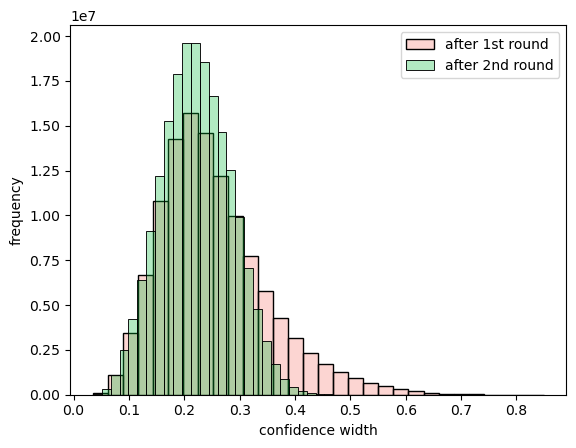

In [18]:
# create a hypothetical case where these are evaluated what happens with the confidence sets
#plt.hist(aa_predictions_round_1['std'], label = 'after 1st round')
#plt.hist(aa_predictions_round_2['std'], label = 'after 2nd round')

sns.histplot(data=aa_predictions_round_1, x="std", bins=30, label = 'after 1st round',stat = 'frequency', color = tobias_colors['RED'], alpha = 0.3)
sns.histplot(data=aa_predictions_round_2, x="std", bins=30, color = tobias_colors['GREEN'], label = 'after 2nd round',stat = 'frequency', alpha = 0.3)

#sns.histplot(data=df_mean, x="std", bins=30, color = "tab:purple", label = 'random sampling simulation',stat = 'frequency', alpha = 0.3)

#plt.plot([np.max(aa_predictions_round_1['std']),np.max(aa_predictions_round_1['std'])],[0,2e7], linewidth = 3, color = 'tab:blue', linestyle = '--')
#plt.plot([np.max(aa_predictions_round_2['std']),np.max(aa_predictions_round_2['std'])],[0,2e7], linewidth = 3, color = 'tab:orange', linestyle = "--", label = 'max std.')

#plt.plot([np.mean(aa_predictions_round_1['std']),np.mean(aa_predictions_round_1['std'])],[0,2e7], linewidth = 3, color = 'tab:blue', linestyle = '-', label = 'mean std.')
#plt.plot([np.mean(aa_predictions_round_2['std']),np.mean(aa_predictions_round_2['std'])],[0,2e7], linewidth = 3, color = 'tab:orange', linestyle = "-")


plt.xlabel("confidence width")
plt.ylabel("frequency")
plt.legend()
plt.savefig("std_distribution.pdf",dpi = 200)

In [14]:
#N = 25
x3, y3, d3 = load_third_round()
x4, y4, d4 = load_last_round()
selection = d4[d4['round'] == "4th"]
selection = pd.concat([d3, selection])
selection = selection[['variant','LogFitness','class']]
selection = selection.groupby('variant').agg({'LogFitness': 'mean', 'class': 'first'}).reset_index()
selection = selection.sort_values("LogFitness", ascending=False)
#variants = selection.head(N)['variant'].values.tolist()
#dts_to_vars = pd.DataFrame(data = variants, columns = ['variant'])
dts_to_vars = selection

(array([0.01869362, 0.        , 0.        , 0.03738724, 0.01869362,
        0.        , 0.07477448, 0.07477448, 0.05608086, 0.05608086,
        0.16824259, 0.37387241, 0.37387241, 0.7290512 , 0.93468103,
        1.1776981 , 1.47679603, 1.79458758, 2.13107275, 1.92544292,
        1.64503862, 1.19639172, 0.84121293, 0.41125965, 0.29909793,
        0.13085534, 0.11216172, 0.01869362, 0.        , 0.01869362]),
 array([-0.27131113, -0.20918084, -0.14705054, -0.08492025, -0.02278995,
         0.03934035,  0.10147064,  0.16360094,  0.22573124,  0.28786153,
         0.34999183,  0.41212212,  0.47425242,  0.53638272,  0.59851301,
         0.66064331,  0.7227736 ,  0.7849039 ,  0.8470342 ,  0.90916449,
         0.97129479,  1.03342509,  1.09555538,  1.15768568,  1.21981597,
         1.28194627,  1.34407657,  1.40620686,  1.46833716,  1.53046745,
         1.59259775]),
 <BarContainer object of 30 artists>)

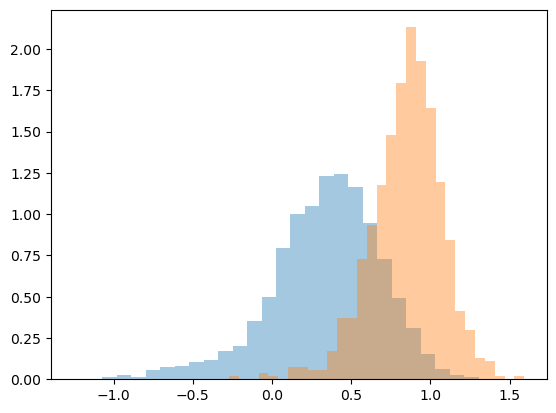

In [15]:
plt.hist(y_first_round.T, bins = 30, alpha = 0.4, density = True)
plt.hist(selection['LogFitness'].values, bins = 30, alpha = 0.4, density = True)

In [16]:
# top variants 
top_1 = dts_to_vars.merge(aa_predictions_round_1,on=["variant"])
top_2 = dts_to_vars.merge(aa_predictions_round_2,on=['variant'])
top_3 = dts_to_vars.merge(df_mean,on=['variant'])
top_full = dts_to_vars.merge(full_std,on=['variant'])

In [17]:
print ('prior',np.mean((top_1['LogFitness']-top_1['mean'])**2))
print ("R2", r2_score(top_1['LogFitness'], top_1['mean']))

print ('after',np.mean((top_2['LogFitness']-top_2['mean'])**2))
print ("R2", r2_score(top_2['LogFitness'], top_2['mean']))


prior 0.07946507718452278
R2 -0.5889893396142969
after 0.07373801891075167
R2 -0.47447067472656346


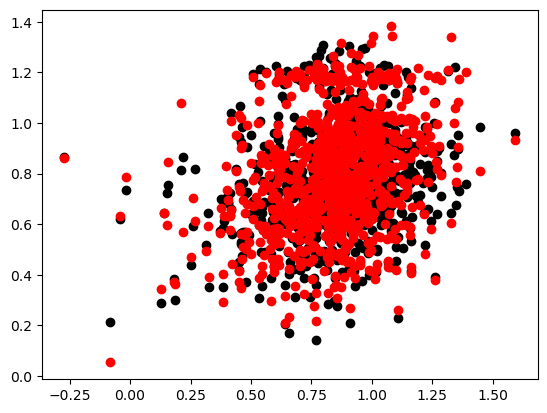

In [18]:
plt.plot(top_1['LogFitness'], top_1['mean'],'ko')
plt.plot(top_2['LogFitness'], top_2['mean'],'ro')

In [19]:
safe_balanced_round_2 = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning_2/AA_model/lists/safe+balanced-aa.csv")
max_std = np.max(safe_balanced_round_2['std'])

In [26]:
max_std

0.4033696947660037

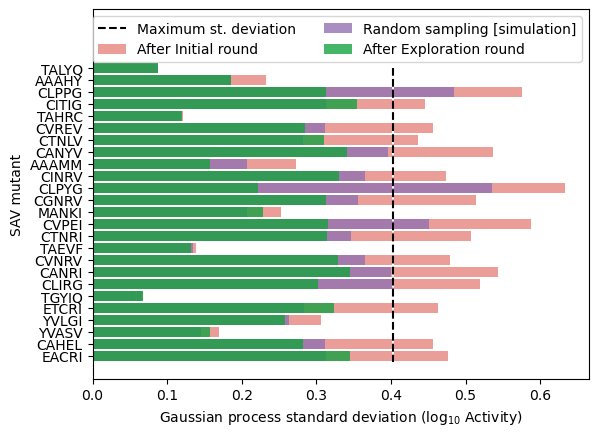

In [22]:
N = 25
f = lambda x: print(x)
sns.barplot(x="std", y="variant", data=top_1.head(N), label = 'After Initial round', color = tobias_colors['RED'],alpha = 0.8)
sns.barplot(x="std", y="variant", data=top_3.head(N), label = 'Random sampling [simulation]', color = 'tab:purple', alpha = 0.8)
sns.barplot(x="std", y="variant", data=top_2.head(N), label = 'After Exploration round', color = tobias_colors['GREEN'], alpha = 0.8)
plt.xlabel("Gaussian process standard deviation ($\log_{10}$ Activity)")
plt.plot([max_std,max_std],[-3.5,N-0.5],'w--')
plt.plot([max_std,max_std],[0,N-0.5],'k--', label = 'Maximum st. deviation')
plt.legend(ncol = 2, loc = 'upper right')
plt.ylabel("SAV mutant")
plt.savefig("std_reduction_2.pdf", dpi = 200,bbox_inches='tight')

In [25]:
top_1.head(N).to_csv("initial.csv")
top_2.head(N).to_csv("random.csv")
top_3.head(N).to_csv("after.csv")


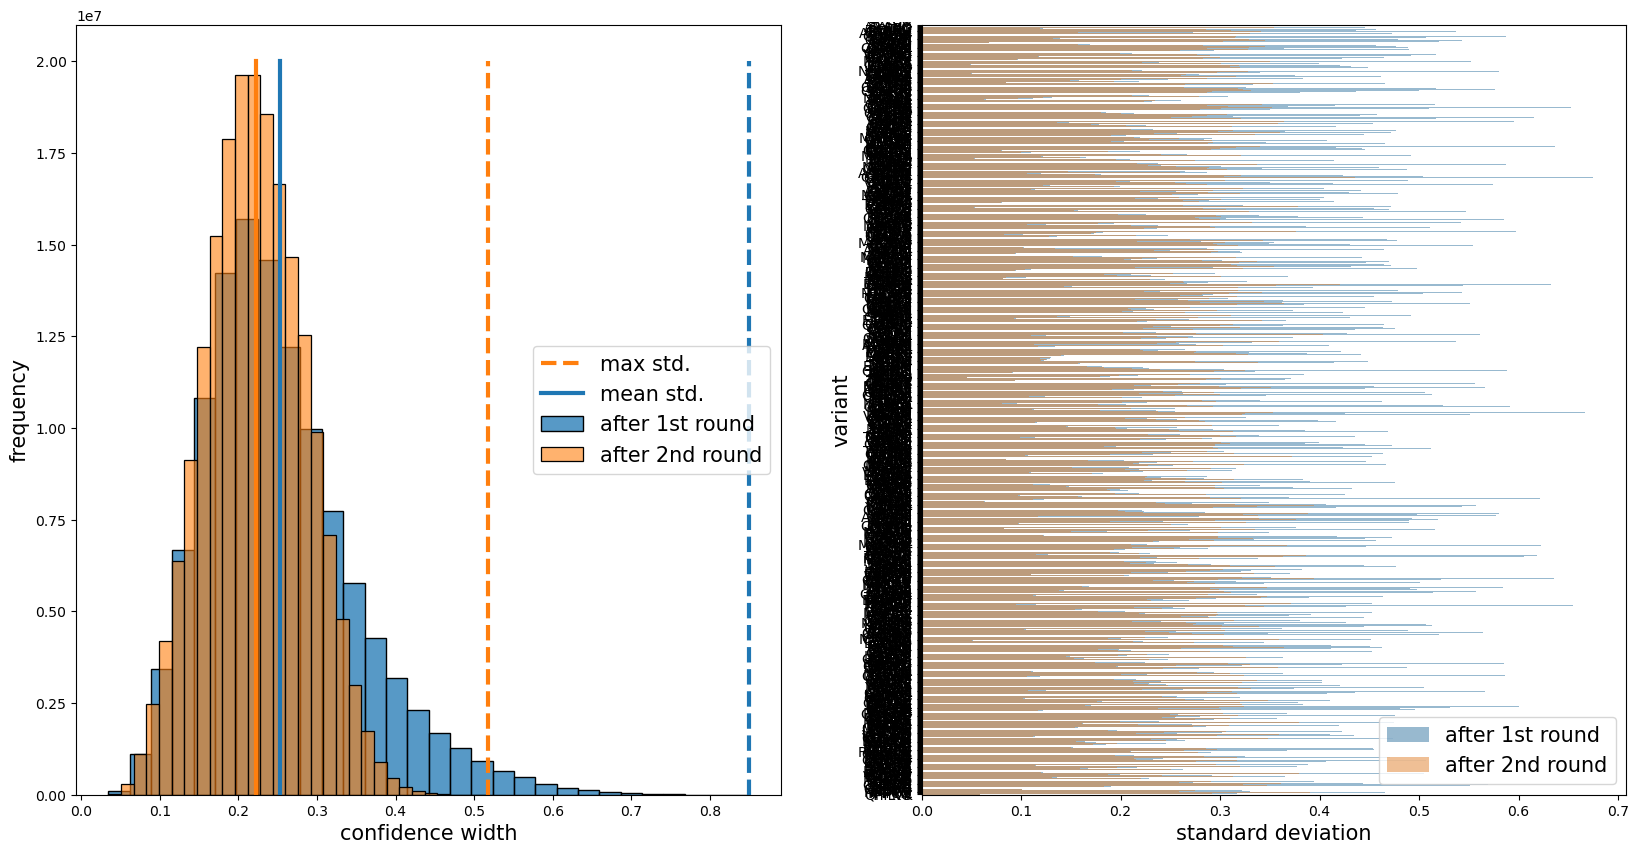

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=aa_predictions_round_1, x="std", bins=30, label = 'after 1st round',stat = 'frequency')
sns.histplot(data=aa_predictions_round_2, x="std", bins=30, color = 'tab:orange', label = 'after 2nd round',stat = 'frequency', alpha = 0.6)
plt.plot([np.max(aa_predictions_round_1['std']),np.max(aa_predictions_round_1['std'])],[0,2e7], linewidth = 3, color = 'tab:blue', linestyle = '--')
plt.plot([np.max(aa_predictions_round_2['std']),np.max(aa_predictions_round_2['std'])],[0,2e7], linewidth = 3, color = 'tab:orange', linestyle = "--", label = 'max std.')

plt.plot([np.mean(aa_predictions_round_1['std']),np.mean(aa_predictions_round_1['std'])],[0,2e7], linewidth = 3, color = 'tab:blue', linestyle = '-', label = 'mean std.')
plt.plot([np.mean(aa_predictions_round_2['std']),np.mean(aa_predictions_round_2['std'])],[0,2e7], linewidth = 3, color = 'tab:orange', linestyle = "-")

plt.xlabel("confidence width",fontsize = 15)
plt.ylabel("frequency",fontsize = 15)
plt.legend(fontsize = 15)
plt.subplot(1,2,2)
sns.barplot(x="std", y="variant", data=top_1, label = 'after 1st round', color = 'tab:blue',alpha = 0.5)
sns.barplot(x="std", y="variant", data=top_2, label = 'after 2nd round', color = 'tab:orange', alpha = 0.5)
plt.xlabel("standard deviation",fontsize = 15)
plt.ylabel("variant",fontsize = 15)

plt.legend(fontsize = 15)
plt.savefig("std_reduction.png", dpi=50, pad_inches=0 , bbox_inches="tight" )